<h1 style="color:blue; text-align:center;""> Lecture 28 </h1>
<hr style="height:5px;border-width:0;color:blue;background-color:blue">

# Support Vector Machine (SVM)

### Why SVM:
- Has a clever way to avoid overfitting
- Can work with relatively large number of features without requiring too much computation
- Has Decision Boundary concept with margin
- For Detailed Mathematical Perspective View:
    - https://www.youtube.com/watch?v=gidJbK1gXmA
    - https://www.youtube.com/watch?v=GcCG0PPV6cg

### Code Implementation

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Dataset Loading

In [2]:
dataset = pd.read_csv("iris.csv", header=None, names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"])

In [3]:
# display all rows in the data in the jupyter file
# pd.options.display.max_rows = None
pd.options.display.max_rows = 10

In [4]:
dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<img src="./iris_flower.png" alt="iris flower image" />

### Visualization

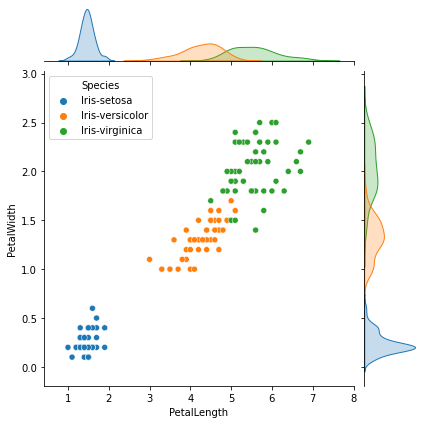

In [5]:
sns.jointplot(x=dataset['PetalLength'], y=dataset['PetalWidth'], hue=dataset['Species'])

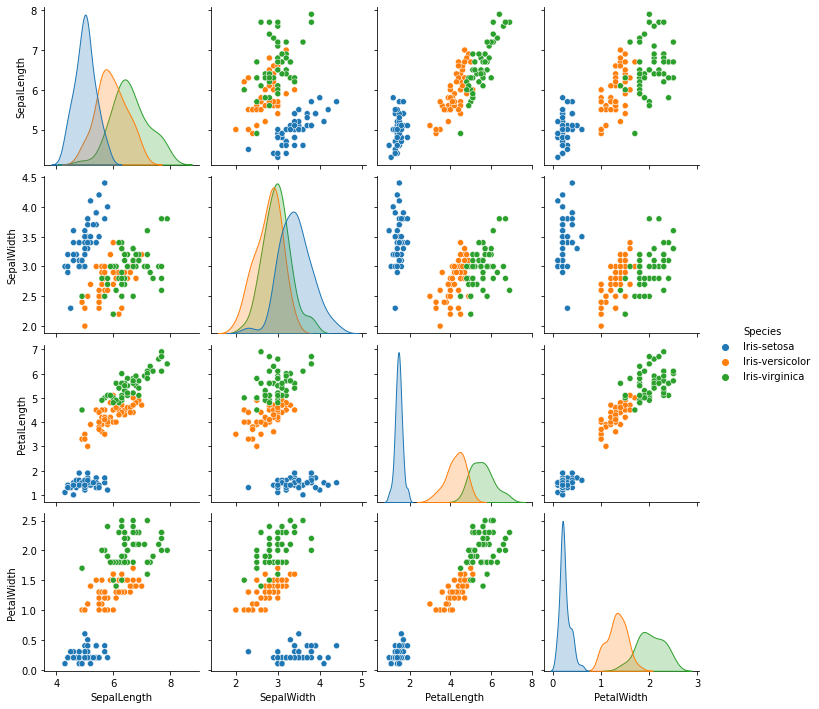

In [6]:
sns.pairplot(data=dataset, hue="Species", diag_kind="kde")

In [7]:
data = dataset.values
X = data[:,0:-1].astype(float)
y = data[:,-1]

In [8]:
X.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [11]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [12]:
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
encoded_y.shape

(150,)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=0, stratify=y, shuffle=True)

In [16]:
X_train.shape

(112, 4)

In [17]:
X_test.shape

(38, 4)

In [18]:
# C -> SVM Regularization Term

svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [19]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [20]:
predictions = svm_clf.predict(X_test)

In [21]:
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2])

In [22]:
from sklearn.metrics import classification_report

In [23]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [24]:
print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.69      0.78        13
           2       0.73      0.92      0.81        12

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



### Kernel Trick

In [12]:
%%html
<center><iframe width="600" height="400" src="https://www.youtube.com/embed/Q7vT0--5VII" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>

### SVC

#### Nonlinear Kernel for Separating nonlinearly separable classes/data points

Instead of using the LinearSVC class, we could use the SVC class with a linear kernel. When creating the SVC model, we would write SVC(kernel="linear", C=1) . Or we could use the SGDClassifier class, with SGDClassifier(loss="hinge",alpha=1/(m*C)) . 
This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle online classification tasks or huge datasets that do not fit in memory (out-of-core training).

In [25]:
# We can set kernel value to: rbf, poly, sigmoid or linear
svm_clf = SVC(kernel='poly')
svm_clf.fit(X_train, y_train)

SVC(kernel='poly')

In [26]:
predictions = svm_clf.predict(X_test)

In [27]:
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [28]:
print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Decision Boundary Visualization

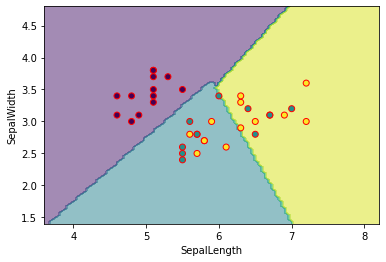

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay

# as DecisionBoundary needs (rows X 2) shape we select SepalLength and 
# SepalWidth as the features on which classification will be carried out 
# and the classification boundary will be drawn
x_train_2d = X_train[:,:2]
x_test_2d = X_test[:,:2]

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train_2d, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svm_classifier,x_test_2d, response_method="predict",
    xlabel='SepalLength', ylabel='SepalWidth', alpha=0.5)

# firrst feature: SepalLength x_test_2d[:,0] - selecting first column
# second feature: SepalWidth x_test_2d[:,1] - selecting second column
# edgecolour: outline colour of the circle of the example in the plot
disp.ax_.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, edgecolor="r") 

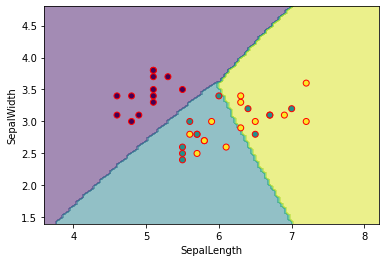

In [30]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train_2d, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svm_classifier,x_test_2d, response_method="predict",
    xlabel='SepalLength', ylabel='SepalWidth', alpha=0.5)

# firrst feature: SepalLength x_test_2d[:,0] - selecting first column
# second feature: SepalWidth x_test_2d[:,1] - selecting second column
# edgecolour: outline colour of the circle of the example in the plot
disp.ax_.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, edgecolor="r") 

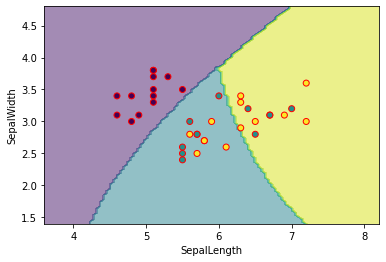

In [31]:
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(x_train_2d, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svm_classifier,x_test_2d, response_method="predict",
    xlabel='SepalLength', ylabel='SepalWidth', alpha=0.5)

# firrst feature: SepalLength x_test_2d[:,0] - selecting first column
# second feature: SepalWidth x_test_2d[:,1] - selecting second column
# edgecolour: outline colour of the circle of the example in the plot
disp.ax_.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, edgecolor="r") 